In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [11]:
# The direct URL to the raw .txt file on GitHub
url_turbine = "https://raw.githubusercontent.com/raccamateo/NEC_BP_LR/c7a75405cbda61f7e6a5d289065d5ea9baf2af19/A1-turbine.txt"

# Read the .txt file assuming it's tab-delimited
try:
    turbine_data = pd.read_csv(url_turbine, sep='\t', header=0)
    print(turbine_data.head())
except Exception as e:
    print(f"An error occurred while trying to read the file: {e}")


   height_over_sea_level   fall  net_fall  flow  \
0                  624.0  89.16    89.765   3.5   
1                  628.0  93.16    93.765   3.5   
2                  602.0  67.84    66.415   6.5   
3                  599.0  64.84    63.415   6.5   
4                  630.0  94.69    93.540   8.0   

   power_of_hydroelectrical_turbine  
0                           2512.85  
1                           2583.79  
2                           3748.77  
3                           3520.65  
4                           6673.84  


In [12]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(turbine_data.head())

First few rows of the dataset:
   height_over_sea_level   fall  net_fall  flow  \
0                  624.0  89.16    89.765   3.5   
1                  628.0  93.16    93.765   3.5   
2                  602.0  67.84    66.415   6.5   
3                  599.0  64.84    63.415   6.5   
4                  630.0  94.69    93.540   8.0   

   power_of_hydroelectrical_turbine  
0                           2512.85  
1                           2583.79  
2                           3748.77  
3                           3520.65  
4                           6673.84  


In [13]:
print(turbine_data.dtypes)

height_over_sea_level               float64
fall                                float64
net_fall                            float64
flow                                float64
power_of_hydroelectrical_turbine    float64
dtype: object


In [14]:
turbine_data = turbine_data.apply(pd.to_numeric, errors='coerce')

In [15]:
# Checking for Missing Values
missing_values_turbine = turbine_data.isnull().sum()
print("Missing values in each column:")
print(missing_values_turbine)

Missing values in each column:
height_over_sea_level               0
fall                                0
net_fall                            0
flow                                0
power_of_hydroelectrical_turbine    0
dtype: int64


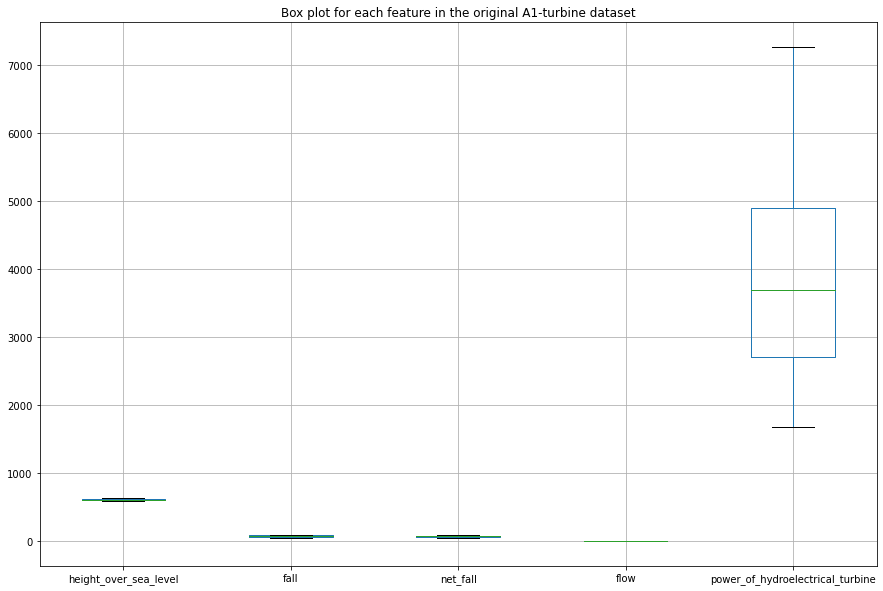

In [16]:
# Looking for Outliers using box plots on the original data (before normalization)
plt.figure(figsize=(15, 10))
turbine_data.boxplot()
plt.title("Box plot for each feature in the original A1-turbine dataset")
plt.show()

In [17]:
def standardize_features(df, target_column):
    features = df.drop(target_column, axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled[target_column] = df[target_column].values  # Add the target column back unchanged
    return df_scaled

In [18]:
# Standardize features except for the target column
standardized_turbine_data = standardize_features(turbine_data, target_column=turbine_data.columns[-1])

In [19]:
# Shuffle the standardized dataset
standardized_turbine_data = standardized_turbine_data.sample(frac=1, random_state=0).reset_index(drop=True)

standardized_turbine_data.to_csv('standardized_turbine_data.csv', index=False)

In [20]:
standardized_turbine_data.to_csv('standardized_turbine_data.csv', index=False)

In [22]:
# Calculate the number of samples for training (85%) and testing (15%)
num_samples = len(standardized_turbine_data)
train_size = int(num_samples * 0.85)
test_size = num_samples - train_size

In [23]:
# Split the dataset
train_data = standardized_turbine_data.iloc[:train_size]
test_data = standardized_turbine_data.iloc[train_size:]

In [24]:
# Separate the features and the target variable for training data
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Separate the features and the target variable for test data
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [25]:
# Displaying the first few rows of the training and test sets
print("Training features:")
print(X_train.head())
print("\nTraining target:")
print(y_train.head())
print("\nTest features:")
print(X_test.head())
print("\nTest target:")
print(y_test.head())

Training features:
   height_over_sea_level      fall  net_fall      flow
0              -1.342867 -1.303205 -1.240958 -1.359556
1               1.455974  1.486262  1.542986 -1.078805
2              -0.169160 -0.238288 -0.329858  1.728703
3              -0.259445 -0.308165 -0.277859  0.324949
4              -1.433153 -1.401964 -1.350833 -1.078805

Training target:
0    1717.89
1    3056.77
2    5414.45
3    4260.53
4    1978.39
Name: power_of_hydroelectrical_turbine, dtype: float64

Test features:
     height_over_sea_level      fall  net_fall      flow
383               0.733692  0.844330  0.854347 -1.640307
384               1.546259  1.564523  1.576446 -0.236553
385              -1.884579 -1.896689 -1.930501  0.605700
386               0.914263  0.917002  0.965578 -0.517304
387               1.185118  1.201166  1.254960 -0.798055

Test target:
383    1996.27
384    4509.67
385    2915.86
386    3776.31
387    3432.48
Name: power_of_hydroelectrical_turbine, dtype: float64
